In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [230]:
data1=pd.read_csv(r"C:\Users\avina\Downloads\walmart material\walmart-recruiting-store-sales-forecasting\train.csv\train.csv")
data1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [238]:
data1.date = pd.to_datetime(data1.Date)

C:\Users\avina\AppData\Local\Temp\ipykernel_9248\994639743.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data1.date = pd.to_datetime(data1.Date)


In [242]:
data1['week'] = data1.date.dt.week 
data1['year'] = data1.date.dt.year

C:\Users\avina\AppData\Local\Temp\ipykernel_9248\3564962705.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data1['week'] = data1.date.dt.week


In [240]:
holiday_weeks = data1[data1.IsHoliday==True].week.unique()
holiday_names = ['super bowl', 'labor day', 'thanksgiving', 'christmas']
holiday_colors = ['c', 'y', 'm', 'r']
print(holiday_weeks)

[ 6 36 47 52]


C:\Users\avina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\avina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\avina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


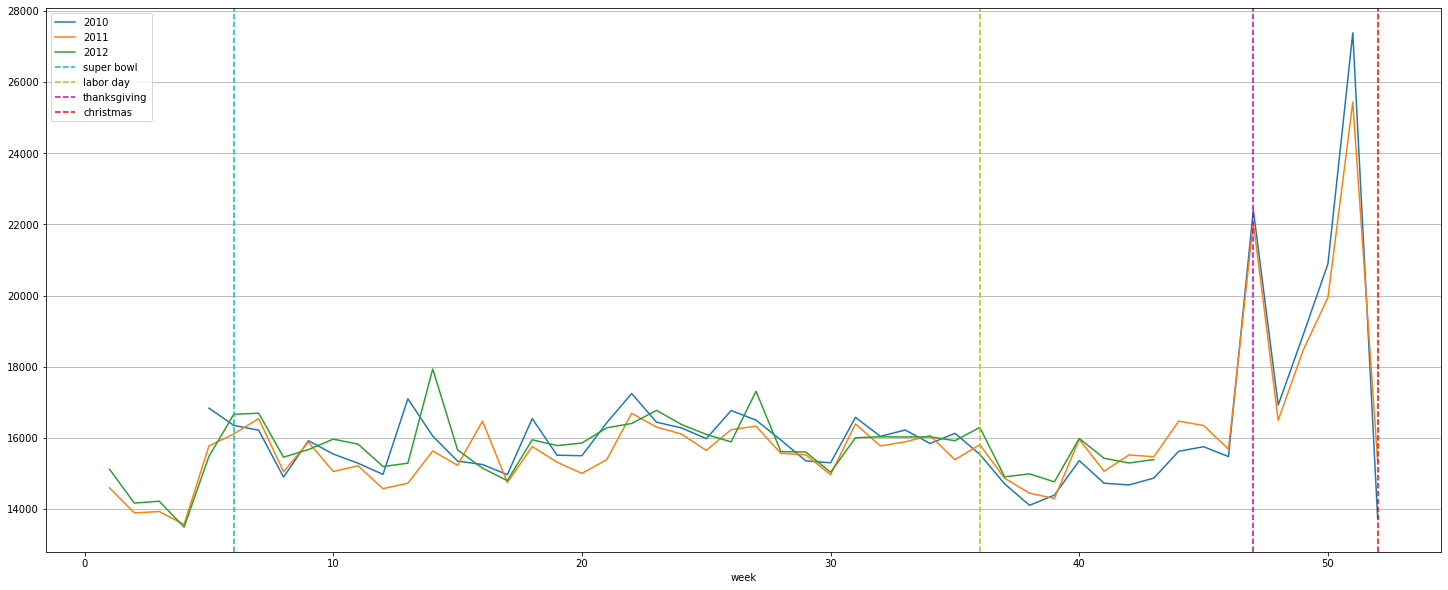

In [246]:
years = [2010, 2011, 2012]
plt.figure(figsize=(25, 10))

# Plots por ano
for year in years:
    df_grouped = data1[data1.year == year].groupby('week')['Weekly_Sales'].mean()
    sns.lineplot(df_grouped.index, df_grouped.values)

# Marcadores de feriado
for week, name, color in zip(holiday_weeks, holiday_names, holiday_colors):
    plt.axvline(week, color=color, ls='--', label=name)
    plt.legend()

plt.grid(axis='y')
plt.legend(['2010', '2011', '2012'] + holiday_names)
plt.show()

In [107]:
data2=pd.read_csv(r"C:\Users\avina\Downloads\walmart material\walmart-recruiting-store-sales-forecasting\test.csv\test.csv")
data2.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [108]:
data3=pd.read_csv(r"C:\Users\avina\Downloads\walmart material\walmart-recruiting-store-sales-forecasting\features.csv\features.csv")
data3.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [109]:
data4=pd.read_csv(r"C:\Users\avina\Downloads\walmart material\walmart-recruiting-store-sales-forecasting\stores.csv")
data4.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [110]:
print(data1.shape)
print(data2.shape)
print(data3.shape)
print(data4.shape)

(421570, 5)
(115064, 4)
(8190, 12)
(45, 3)


In [111]:
data=data1.merge(data3, how='left').merge(data4, how='left')
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [112]:
data.shape

(421570, 16)

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [114]:
data.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

<AxesSubplot:>

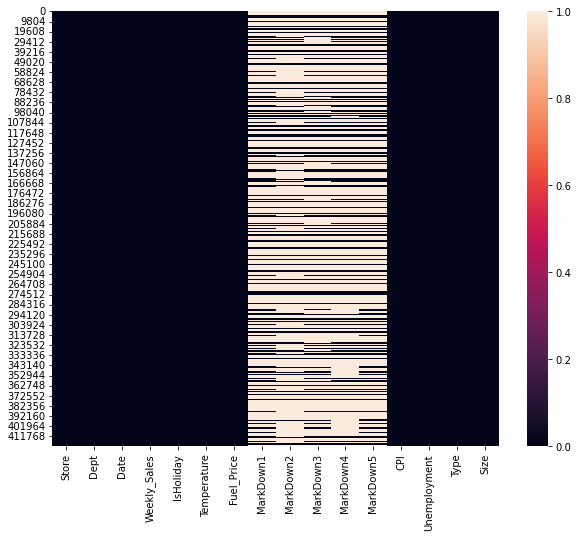

In [115]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.isna())

In [170]:
new_data=data.sample(50000)

In [174]:
new_data.shape

(50000, 16)

## Single Varibale Analysis

In [175]:
new_data['Store'][:10]

9532       1
75128      8
100362    11
51073      6
135497    14
44843      5
385877    41
27478      3
264479    27
101221    11
Name: Store, dtype: int64

In [176]:
new_data['Store'].value_counts(ascending=False)

34    1297
13    1271
4     1255
20    1251
2     1240
19    1232
27    1229
14    1228
1     1211
40    1209
6     1208
24    1206
28    1205
32    1201
15    1193
23    1190
10    1188
7     1185
31    1182
41    1176
45    1175
11    1173
25    1155
18    1151
39    1148
29    1145
8     1135
12    1135
17    1124
16    1123
26    1107
21    1105
35    1095
22    1090
3     1089
5     1079
9     1041
38     894
44     893
30     875
42     830
37     816
43     771
33     757
36     737
Name: Store, dtype: int64

<Figure size 864x864 with 0 Axes>

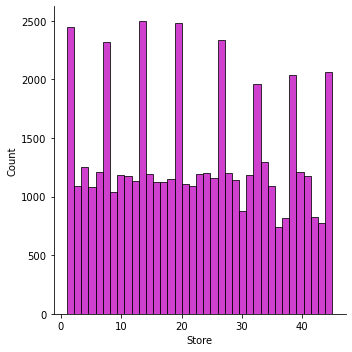

In [177]:
plt.figure(figsize=(12, 12))
sns.displot(new_data['Store'], color='m')

In [178]:
new_data['Dept'].value_counts()

52    807
91    804
12    801
25    795
82    787
     ... 
78     24
77     22
65     20
43      2
39      1
Name: Dept, Length: 81, dtype: int64

<Figure size 864x864 with 0 Axes>

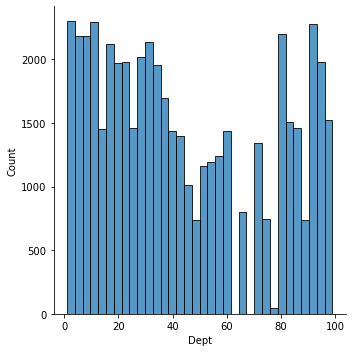

In [179]:
plt.figure(figsize=(12,12))
sns.displot(new_data['Dept'])

In [180]:
new_data['Weekly_Sales'].value_counts()

10.00       45
5.00        35
15.00       21
11.97       21
35.00       20
            ..
685.01       1
6490.46      1
43883.47     1
30273.66     1
969.94       1
Name: Weekly_Sales, Length: 47252, dtype: int64

<Figure size 1152x576 with 0 Axes>

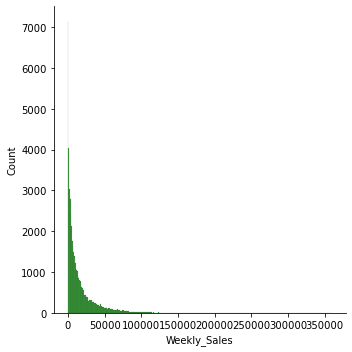

In [181]:
plt.figure(figsize=(16, 8))
sns.displot(new_data['Weekly_Sales'], color='g')

## Is Holiday

In [182]:
new_data['IsHoliday'].value_counts()

False    46388
True      3612
Name: IsHoliday, dtype: int64

In [183]:
new_data['IsHoliday'].value_counts(normalize=True)

False    0.92776
True     0.07224
Name: IsHoliday, dtype: float64

C:\Users\avina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IsHoliday', ylabel='count'>

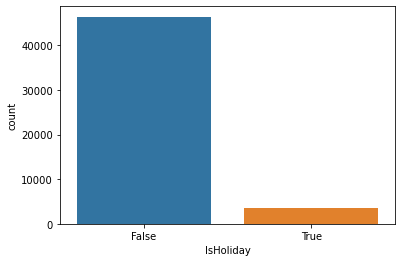

In [184]:
sns.countplot(new_data['IsHoliday'])

## Temperature

In [185]:
new_data['Temperature'][:10]

9532      84.11
75128     83.57
100362    87.73
51073     70.84
135497    75.93
44843     71.10
385877    50.14
27478     87.14
264479    78.44
101221    88.93
Name: Temperature, dtype: float64

<Figure size 1152x576 with 0 Axes>

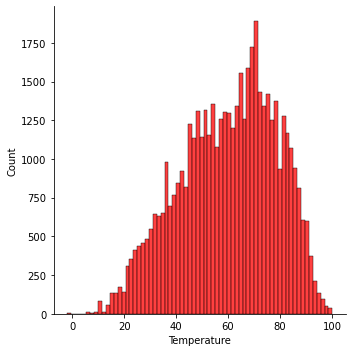

In [186]:
plt.figure(figsize=(16,8))
sns.displot(new_data['Temperature'], color='r')

## Fuel Price

In [187]:
new_data['Fuel_Price'][:10]

9532      2.637
75128     3.480
100362    2.692
51073     3.617
135497    2.847
44843     2.603
385877    3.779
27478     3.575
264479    3.863
101221    2.664
Name: Fuel_Price, dtype: float64

<Figure size 1152x576 with 0 Axes>

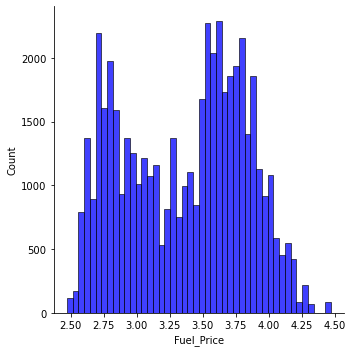

In [188]:
plt.figure(figsize=(16,8))
sns.displot(new_data['Fuel_Price'], color='b')

## CPI

In [189]:
new_data['CPI'][:10]

9532      211.453772
75128     218.689555
100362    214.973044
51073     224.804222
135497    182.238988
44843     212.226946
385877    198.822132
27478     218.727522
264479    142.170563
101221    214.931419
Name: CPI, dtype: float64

<Figure size 1152x576 with 0 Axes>

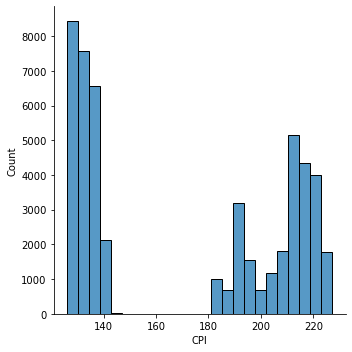

In [190]:
plt.figure(figsize=(16, 8))
sns.displot(new_data['CPI'])

## Unemployment

In [191]:
new_data['Unemployment'][:10]

9532      7.808
75128     6.425
100362    7.346
51073     5.329
135497    8.899
44843     6.768
385877    6.195
27478     7.567
264479    8.239
101221    7.346
Name: Unemployment, dtype: float64

<Figure size 1152x576 with 0 Axes>

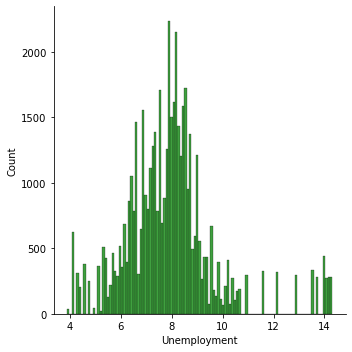

In [192]:
plt.figure(figsize=(16, 8))
sns.displot(new_data['Unemployment'], color='g')

## Type

In [193]:
new_data['Type'].value_counts()

A    25658
B    19263
C     5079
Name: Type, dtype: int64

In [194]:
new_data['Type'].value_counts(normalize=True)

A    0.51316
B    0.38526
C    0.10158
Name: Type, dtype: float64

C:\Users\avina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

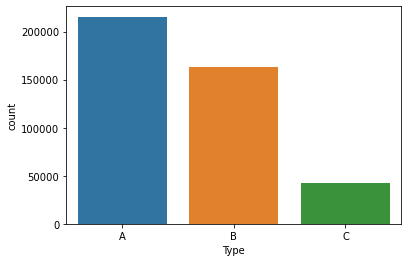

In [195]:
sns.countplot(data['Type'])

In [196]:
new_data['Size'][:10]

9532      151315
75128     155078
100362    207499
51073     202505
135497    200898
44843      34875
385877    196321
27478      37392
264479    204184
101221    207499
Name: Size, dtype: int64

<Figure size 1152x576 with 0 Axes>

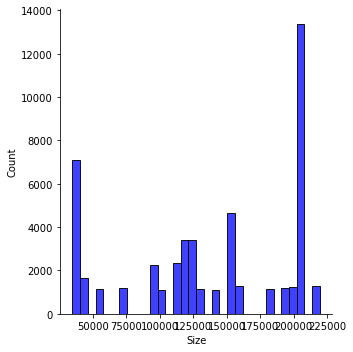

In [197]:
plt.figure(figsize=(16, 8))
sns.displot(new_data['Size'], color='b')

## Correlation

In [198]:
corr_matrix=new_data.corr()

In [199]:
corr_df=corr_matrix['Weekly_Sales'].sort_values(ascending=False)
corr_df

Weekly_Sales    1.000000
Size            0.247252
Dept            0.150915
MarkDown5       0.086416
MarkDown1       0.082022
MarkDown3       0.072329
MarkDown4       0.047276
MarkDown2       0.030688
IsHoliday       0.013661
Fuel_Price     -0.002093
Temperature    -0.005960
CPI            -0.020328
Unemployment   -0.027358
Store          -0.086167
Name: Weekly_Sales, dtype: float64

#### we are finding correlation for weekly sales because weekly sales is a dependent feature

## Handling categorical features

#### 1. Is holiday

In [200]:
def convert_holiday(x):
    if x==True:
        return 1
    else:
        return 0

In [201]:
new_data['IsHoliday']=new_data['IsHoliday'].apply(convert_holiday)

In [202]:
new_data['IsHoliday'][:10]

9532      0
75128     0
100362    0
51073     0
135497    0
44843     0
385877    0
27478     0
264479    0
101221    0
Name: IsHoliday, dtype: int64

In [203]:
new_data['Type'].value_counts()

A    25658
B    19263
C     5079
Name: Type, dtype: int64

In [204]:
type_Df=pd.get_dummies(new_data['Type'], drop_first=True, prefix='Type')
type_Df.head(2)

,Type_B,Type_C
9532,0,0
75128,0,0


In [205]:
new_data=pd.concat([new_data, type_Df], axis=1)
new_data.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Type_B,Type_C
9532,1,94,2010-06-18,66420.45,0,84.11,2.637,NaN,NaN,NaN,NaN,NaN,211.453772,7.808,A,151315,0,0
75128,8,54,2011-07-08,42.24,0,83.57,3.480,NaN,NaN,NaN,NaN,NaN,218.689555,6.425,A,155078,0,0


In [206]:
new_data['Type_B'].isnull().sum()

0

In [207]:
new_data.drop('Type', axis=1, inplace=True)

In [208]:
new_data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Type_B', 'Type_C'],
      dtype='object')

## Handling dates

In [209]:
new_data.Date.dtype

dtype('O')

In [210]:
date=pd.to_datetime(new_data['Date'])
date[:10]

9532     2010-06-18
75128    2011-07-08
100362   2010-08-13
51073    2012-10-05
135497   2010-06-04
44843    2010-10-01
385877   2012-10-05
27478    2011-07-15
264479   2012-08-10
101221   2010-08-20
Name: Date, dtype: datetime64[ns]

In [211]:
date.dt.month[:5]

9532       6
75128      7
100362     8
51073     10
135497     6
Name: Date, dtype: int64

In [212]:
date.dt.year[:10]

9532      2010
75128     2011
100362    2010
51073     2012
135497    2010
44843     2010
385877    2012
27478     2011
264479    2012
101221    2010
Name: Date, dtype: int64

In [213]:
new_data['Month']=date.dt.month

In [214]:
new_data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Type_B', 'Type_C',
       'Month'],
      dtype='object')

In [215]:
new_data.drop('Date', axis=1, inplace=True)

In [216]:
new_data.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Type_B', 'Type_C',
       'Month'],
      dtype='object')

In [217]:
new_data.isnull().sum()

Store               0
Dept                0
Weekly_Sales        0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1       31915
MarkDown2       36652
MarkDown3       33556
MarkDown4       33810
MarkDown5       31840
CPI                 0
Unemployment        0
Size                0
Type_B              0
Type_C              0
Month               0
dtype: int64

In [218]:
new_data.shape

(50000, 17)

<AxesSubplot:>

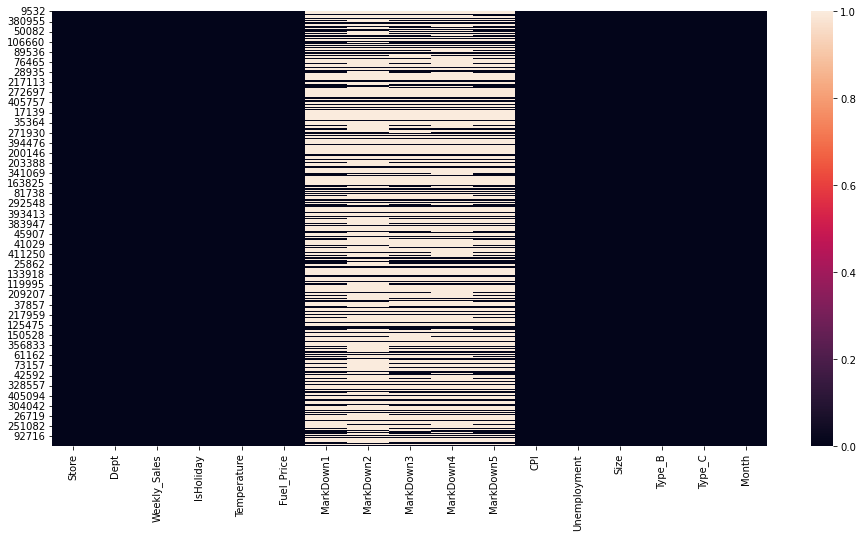

In [219]:
plt.figure(figsize=(16, 8))
sns.heatmap(new_data.isna())

In [220]:
new_data.fillna(value=0, inplace=True)

In [221]:
new_data.isnull().sum()

Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Size            0
Type_B          0
Type_C          0
Month           0
dtype: int64

In [223]:
corr_matrix=new_data.corr()
corr_df=corr_matrix['Weekly_Sales'].sort_values(ascending=False)
corr_df

Weekly_Sales    1.000000
Size            0.247252
Dept            0.150915
MarkDown5       0.050911
MarkDown1       0.048031
MarkDown3       0.047291
MarkDown4       0.039236
Month           0.033050
MarkDown2       0.024525
IsHoliday       0.013661
Fuel_Price     -0.002093
Temperature    -0.005960
CPI            -0.020328
Unemployment   -0.027358
Store          -0.086167
Type_C         -0.095324
Type_B         -0.137200
Name: Weekly_Sales, dtype: float64

<AxesSubplot:>

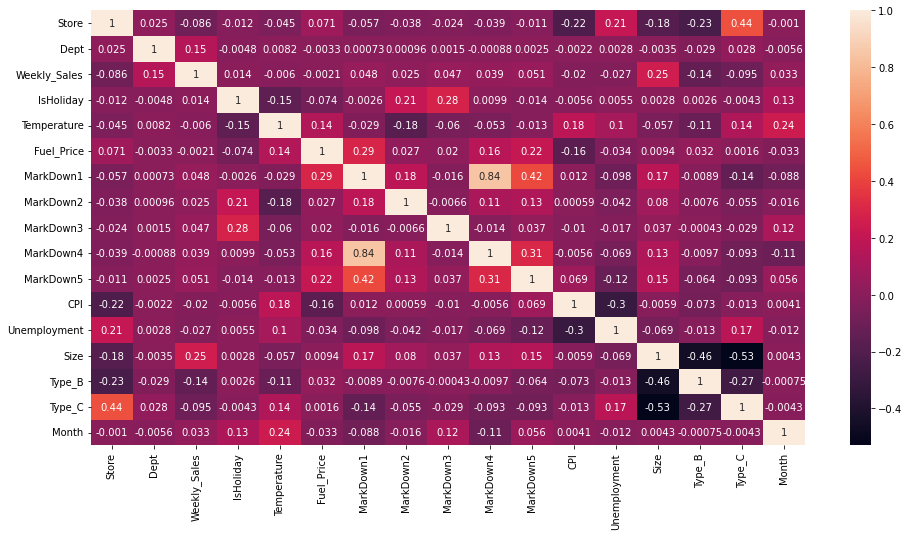

In [224]:
plt.figure(figsize=(16, 8))
sns.heatmap(new_data.corr(), annot=True)

In [225]:
new_data.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Type_B', 'Type_C',
       'Month'],
      dtype='object')

In [226]:
len(new_data.columns)

17

In [227]:
new_data.drop(['CPI', 'Unemployment', 'Fuel_Price'], axis=1, inplace=True)

In [228]:
len(new_data.columns)

14